# Parameter research

See which parameters have a beneficial affect on the fitness of an agent. A population is evolved through an evolutionary algorithm. This is performed until a population does not improve its score further. More details about the termination can be seen in the ```termination.ipynb``` file.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from util.data_log_reader import DataLogReader
from util.data_log_table import DataLogTable
from util.data_visual import set_mpl_font_sizes
from util.evolution_parameters import EvolutionParameters

In [6]:
# Run cell to increase font sizes. Especially usefull when saving plots
set_mpl_font_sizes()

In [7]:
def get_best_values_mean_and_std(data_log_table, parameters):
    """
    Return the mean and std of the best agent per run. The results are found by mapping the
    parameters against the data_log_table and obtaining the corresponding data file.
    """

    file_path = data_log_table.get_file_path(parameters)

    if file_path is None:
        print(f"Warning: File not found for {parameters}")
        return None, None

    reader = DataLogReader(file_path, types=[int, float, float, float])

    best_values = reader.get_homogeneous_data_by_heading("Best")

    max_values_per_run = np.amax(best_values, axis=1)

    return np.mean(max_values_per_run), np.std(max_values_per_run)

## Results

### Results: Mutation rate and activation function

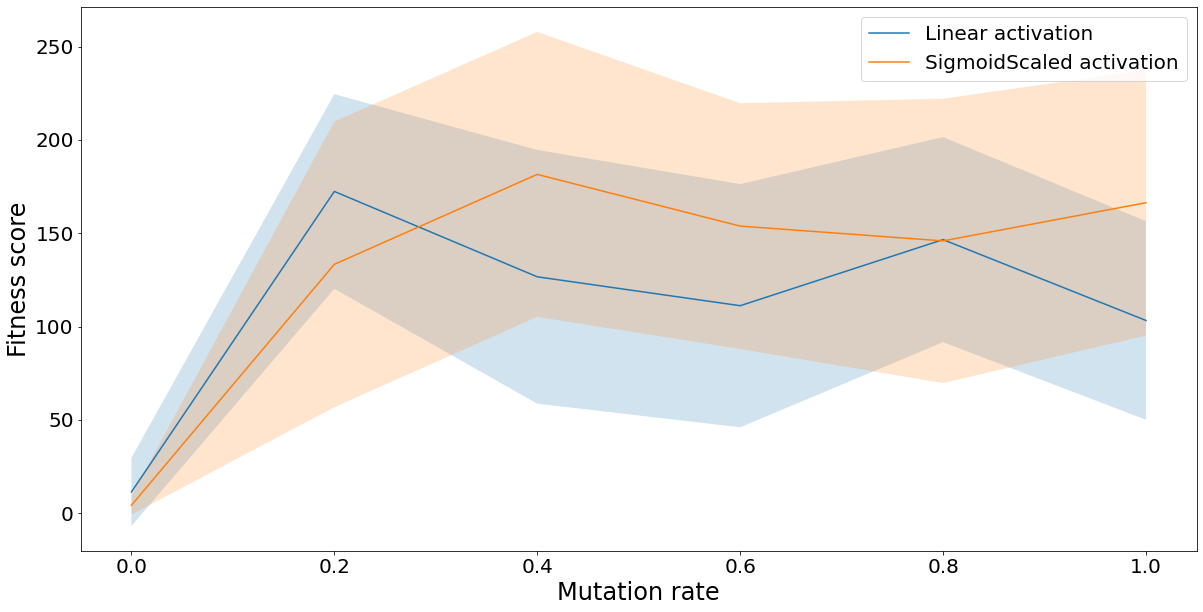

In [13]:
data_log_table = DataLogTable("../data/datatable.txt")

mutation_rates = [0, 0.2, 0.4, 0.6, 0.8, 1]

x_def, y_def, y_def_std = [], [], [] # Default activation
x_sig, y_sig, y_sig_std = [], [], [] # Scaled sigmoid activation

for mutation_rate in mutation_rates:

    activation_name = "Default"
    parameters = EvolutionParameters(10, "Default", "Default", "Default", activation_name, mutation_rate, "Default", "Default", [], 60, 5)
    mean, std = get_best_values_mean_and_std(data_log_table, parameters)

    if mean != None and std != None:
        x_def.append(mutation_rate)
        y_def.append(mean)
        y_def_std.append(std)
    
    activation_name = "SigmoidScaledSmooth"
    parameters = EvolutionParameters(10, "Default", "Default", "Default", activation_name, mutation_rate, "Default", "Default", [], 60, 5)
    mean, std = get_best_values_mean_and_std(data_log_table, parameters)

    if mean != None and std != None:
        x_sig.append(mutation_rate)
        y_sig.append(mean)
        y_sig_std.append(std)

x_def, y_def, y_def_std = np.array(x_def), np.array(y_def), np.array(y_def_std)
x_sig, y_sig, y_sig_std = np.array(x_sig), np.array(y_sig), np.array(y_sig_std)

plt.plot(x_def, y_def, label="Linear activation")
plt.fill_between(x_def, y_def - y_def_std, y_def + y_def_std, alpha=0.2)

plt.plot(x_sig, y_sig, label="Scaled sigmoid activation")
plt.fill_between(x_sig, y_sig - y_sig_std, y_sig + y_sig_std, alpha=0.2)

plt.xlabel("Mutation rate")
plt.ylabel("Fitness score")

plt.legend()
plt.show()